In [1]:
import pandas as pd
from mplsoccer import Pitch
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
firstHalf = pd.read_csv("Data/USD/USD.csv")
secondHalf = pd.read_csv("Data/USD/USD2.csv")
firstHalf.insert(7,"Half",1)
firstHalf.dropna(inplace=True)
secondHalf.insert(7,"Half",2)
secondHalf.dropna(inplace=True)
dfs = []
for df in [firstHalf,secondHalf]:
    startX = []
    startY = []
    endX = []
    endY = []
    for i in range(df.shape[0]):
        row = df.iloc[i]
        startX.append(float(row.get("Start Pos").split(", ")[0][1:]))
        startY.append(float(row.get("Start Pos").split(", ")[1][:-1]))
        endX.append(float(row.get("End Pos").split(", ")[0][1:]))
        endY.append(float(row.get("End Pos").split(", ")[1][:-1]))
    df = df.assign(startX = startX)
    df =df.assign(startY = startY)
    df =df.assign(endX = endX)
    df =df.assign(endY = endY)
    dfs.append(df)
firstHalf=dfs[0]
firstHalf= firstHalf.reset_index()
secondHalf=dfs[1]
secondHalf= secondHalf.reset_index()
secondHalf = secondHalf.assign(numOpportunity = secondHalf.get("numOpportunity")+firstHalf.get("numOpportunity").max()+1)
secondHalf = secondHalf.assign(startX = 120-secondHalf.get("startX"))
secondHalf = secondHalf.assign(startY = 80-secondHalf.get("startY"))
secondHalf = secondHalf.assign(endX = 120-secondHalf.get("endX"))
secondHalf = secondHalf.assign(endY = 80-secondHalf.get("endY"))
data = pd.merge(firstHalf,secondHalf,how="outer")


In [3]:
def distance(startX,startY,endX,endY):
    return np.sqrt((endX-startX)**2+(endY-startY)**2)

In [4]:
balls = data[((data.get("Event") == "1st Ball") | (data.get("Event")=="2nd Ball"))]
firstBalls = balls[balls.get("Event")=="1st Ball"]
secondBalls = balls[balls.get("Event")=="2nd Ball"]
secondBalls

,index,Game,numOpportunity,Event,Result,Start Pos,End Pos,Team,Half,Player,startX,startY,endX,endY
2,5,USD,11.0,2nd Ball,Successful,"[35.33333333333332, 72.0]","[35.52380952380951, 70.47619047619048]",UCSD,2,Enter a player,84.666667,8.000000,84.476190,9.523810
5,9,USD,11.0,2nd Ball,Successful,"[89.42857142857142, 17.14285714285714]","[89.61904761904759, 17.14285714285714]",USD,2,Enter a player,30.571429,62.857143,30.380952,62.857143
11,15,USD,11.0,2nd Ball,Successful,"[49.42857142857141, 15.23809523809524]","[49.42857142857141, 15.23809523809524]",USD,2,Enter a player,70.571429,64.761905,70.571429,64.761905
40,51,USD,13.0,2nd Ball,Successful,"[76.47619047619045, 48.57142857142857]","[76.47619047619045, 48.57142857142857]",UCSD,2,Enter a player,43.523810,31.428571,43.523810,31.428571
42,55,USD,13.0,2nd Ball,Successful,"[78.19047619047618, 60.0]","[78.19047619047618, 60.0]",USD,2,Enter a player,41.809524,20.000000,41.809524,20.000000
49,69,USD,14.0,2nd Ball,Successful,"[45.8095238095238, 7.428571428571431]","[45.8095238095238, 7.428571428571431]",UCSD,2,Enter a player,74.190476,72.571429,74.190476,72.571429
52,73,USD,14.0,2nd Ball,Successful,"[80.66666666666666, 24.19047619047619]","[80.66666666666666, 24.19047619047619]",USD,2,Enter a player,39.333333,55.809524,39.333333,55.809524
62,87,USD,15.0,2nd Ball,Successful,"[78.19047619047618, 32.761904761904766]","[78.19047619047618, 32.761904761904766]",UCSD,2,Enter a player,41.809524,47.238095,41.809524,47.238095
72,101,USD,16.0,2nd Ball,Successful,"[70.76190476190476, 70.28571428571428]","[70.76190476190476, 70.28571428571428]",USD,2,Enter a player,49.238095,9.714286,49.238095,9.714286
74,105,USD,16.0,2nd Ball,Successful,"[53.6190476190476, 64.76190476190476]","[53.80952380952379, 64.76190476190476]",UCSD,2,Enter a player,66.380952,15.238095,66.190476,15.238095


,,index,Game,numOpportunity,Event,Start Pos,End Pos,Half,Player,startX,startY,endX,endY
Team,Result,,,,,,,,,,,,
UCSD,Successful,16,16,16,16,16,16,16,16,16,16,16,16
USD,Successful,13,13,13,13,13,13,13,13,13,13,13,13


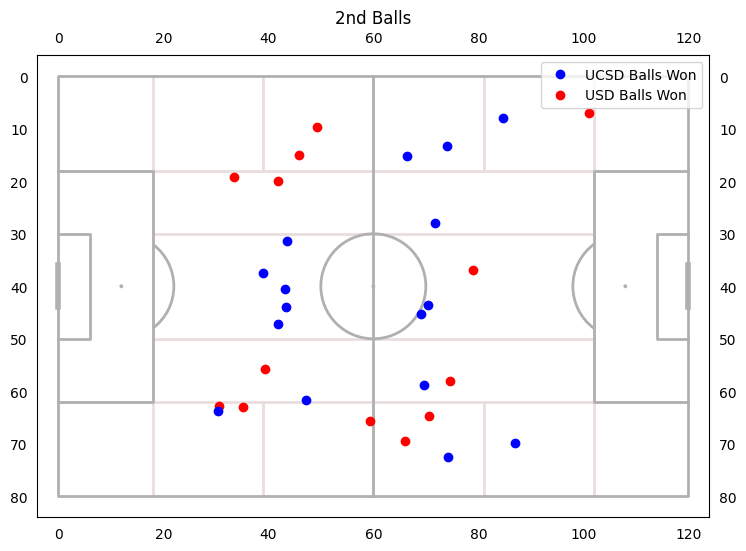

In [5]:
balls
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
for i in range(secondBalls.shape[0]):
    row = secondBalls.iloc[i]
    team = row.get("Team")
    result = row.get("Result")
    if team=="UCSD":
        color = "ob"
        label = "UCSD Balls Won"
    else:
        color = "ro"
        label = "USD Balls Won"
    plt.plot(row.get("startX"),row.get("startY"),color,label = label)
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
plt.legend(unique_labels.values(), unique_labels.keys())
plt.title("2nd Balls")
secondBalls.groupby(["Team","Result"]).count()

In [6]:
ballsHalf = balls[balls.get("Half") == 2]
bothBalls = []
balls1 = []
balls2 = []
previous = balls.iloc[0]
for i in range(1, balls.shape[0]):
    previous = balls.iloc[i-1]
    prevTeam = previous.get("Team") == "UCSD"
    prevResult = previous.get("Result")
    row = balls.iloc[i]
    currTeam = row.get("Team") == "UCSD"
    currResult = row.get("Result")
    if previous.get("Event") == "1st Ball" and row.get("Event") == "2nd Ball":
        if prevResult == "Unsuccessful":
            prevTeam = bool(~prevTeam)
            prevResult = "Successful"
        if currResult == "Unsuccessful":
            currTeam = bool(~currTeam)
            currResult ="Successful"
        bothBalls.append([prevTeam,prevResult,currTeam,currResult])
        balls1.append([previous.get("Team")=="UCSD",previous.get("Result")])
        balls2.append([row.get("Team")=="UCSD",row.get("Result")])
    #previous = row
allBalls = pd.DataFrame(bothBalls,columns=["1st Ball Team","1st Ball Result","2nd Ball Team","2nd Ball Result"])
opp1st = allBalls[~allBalls.get("1st Ball Team")]
opp1st.groupby("2nd Ball Team").count()

,1st Ball Team,1st Ball Result,2nd Ball Result
2nd Ball Team,,,
False,8,8,8
True,8,8,8


In [7]:
chances = data[((data.get("Event") != "1st Ball") & (data.get("Event")!="2nd Ball"))]
chances

,index,Game,numOpportunity,Event,Result,Start Pos,End Pos,Team,Half,Player,startX,startY,endX,endY
4,9,USD,0.0,Pass,Unsuccessful,"[64.66666666666666, 71.80952380952381]","[53.23809523809522, 63.61904761904762]",USD,1,Enter a player,64.666667,71.809524,53.238095,63.619048
6,11,USD,0.0,Pass,Successful,"[53.42857142857141, 62.857142857142854]","[82.19047619047618, 76.57142857142857]",UCSD,1,Enter a player,53.428571,62.857143,82.190476,76.571429
8,13,USD,0.0,Pass,Successful,"[85.8095238095238, 74.85714285714286]","[104.66666666666666, 60.76190476190476]",UCSD,1,Enter a player,85.809524,74.857143,104.666667,60.761905
10,15,USD,0.0,Pass,Successful,"[118.19047619047618, 54.285714285714285]","[113.23809523809524, 32.761904761904766]",UCSD,1,Enter a player,118.190476,54.285714,113.238095,32.761905
12,17,USD,0.0,Shot(foot),Unsuccessful,"[112.85714285714286, 32.761904761904766]","[118.76190476190476, 38.66666666666667]",UCSD,1,Enter a player,112.857143,32.761905,118.761905,38.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,235,USD,9.0,Shot(foot),Unsuccessful,"[21.999999999999986, 50.666666666666664]","[2.3809523809523725, 32.952380952380956]",USD,1,Enter a player,22.000000,50.666667,2.380952,32.952381
180,259,USD,10.0,Tackle,Successful,"[26.380952380952372, 14.095238095238102]","[41.8095238095238, 16.76190476190476]",UCSD,1,Enter a player,26.380952,14.095238,41.809524,16.761905
181,261,USD,10.0,Pass,Successful,"[37.8095238095238, 18.85714285714286]","[31.52380952380951, 7.047619047619051]",USD,1,Enter a player,37.809524,18.857143,31.523810,7.047619
182,263,USD,10.0,Pass,Successful,"[37.04761904761903, 3.6190476190476204]","[29.04761904761903, 12.57142857142857]",USD,1,Enter a player,37.047619,3.619048,29.047619,12.571429


In [10]:
chanceTeam = dict()
for i in chances.get("numOpportunity").unique():
    df = chances[data.get("numOpportunity")==i]
    shot = df.iloc[-1]
    if shot.get("Team")=="UCSD":
        team = "UCSD"
    else:
        team = "USD"
    chanceTeam[i]=team
chances = chances.assign(ChanceTeam = chances.get("numOpportunity").apply(lambda opp: chanceTeam[opp]))
ucsdChances = chances[chances.get("ChanceTeam")=="UCSD"]
usdChances = chances[chances.get("ChanceTeam")=="USD"]
usdChances.to_csv("Shots/USDOrigins.csv",index=False)

In [75]:
ucsdOrigins =[]
for i in ucsdChances.get("numOpportunity").unique():
    limited = ucsdChances[ucsdChances.get("numOpportunity") == i].iloc[0]
    ucsdOrigins.append(limited)
ucsdOrigins = pd.DataFrame(ucsdOrigins)

usdOrigins =[]
for i in usdChances.get("numOpportunity").unique():
    limited = usdChances[usdChances.get("numOpportunity") == i].iloc[0]
    usdOrigins.append(limited)
usdOrigins = pd.DataFrame(usdOrigins)
ucsdOrigins

,index,Game,numOpportunity,Event,Result,Start Pos,End Pos,Team,Half,Player,startX,startY,endX,endY,ChanceTeam
4,9,USD,0.0,Pass,Unsuccessful,"[64.66666666666666, 71.80952380952381]","[53.23809523809522, 63.61904761904762]",USD,1,Enter a player,64.666667,71.809524,53.238095,63.619048,UCSD
54,75,USD,14.0,Pass,Successful,"[111.52380952380952, 32.38095238095238]","[89.8095238095238, 3.238095238095241]",UCSD,2,Enter a player,8.476190,47.619048,30.190476,76.761905,UCSD
87,123,USD,16.0,Tackle,Successful,"[19.7142857142857, 11.61904761904762]","[36.47619047619046, 14.095238095238102]",USD,2,Enter a player,100.285714,68.380952,83.523810,65.904762,UCSD
104,151,USD,7.0,Tackle,Successful,"[36.85714285714284, 55.61904761904762]","[36.85714285714284, 55.61904761904762]",UCSD,1,Enter a player,36.857143,55.619048,36.857143,55.619048,UCSD


In [77]:
originCounts = ucsdOrigins.groupby(["Event","Team"]).count().reset_index()
# labels = originCounts.get("Event") + " "+originCounts.get("Team")
# plt.pie(originCounts.get("index"),labels = labels,autopct='%1.1f%%')
# plt.title("UCSD Shots Origin")
# plt.show()

originCounts = usdOrigins.groupby(["Event","Team"]).count().reset_index()
# labels = originCounts.get("Event") + " "+originCounts.get("Team")
# plt.pie(originCounts.get("index"),labels = labels,autopct='%1.1f%%')
# plt.title("Opponent Shots Origin")
# plt.show()
originCounts


,Event,Team,index,Game,numOpportunity,Result,Start Pos,End Pos,Half,Player,startX,startY,endX,endY,ChanceTeam
0,Pass,UCSD,4,4,4,4,4,4,4,4,4,4,4,4,4
1,Set Piece,USD,2,2,2,2,2,2,2,2,2,2,2,2,2
2,Tackle,UCSD,4,4,4,4,4,4,4,4,4,4,4,4,4
3,Tackle,USD,7,7,7,7,7,7,7,7,7,7,7,7,7


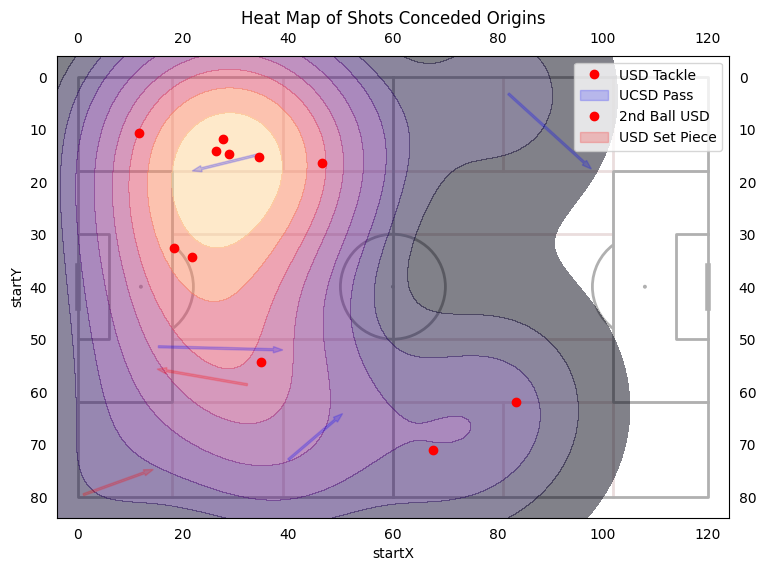

In [80]:
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=usdOrigins.get("startX"),y=usdOrigins.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 10,cmap = "magma")

for i in range(usdOrigins.shape[0]):
    row = usdOrigins.iloc[i]
    team = row.get("Team")
    if team == "UCSD":
            color = "blue"
    else:
            color = "red"
    if row.get("Event") == "Tackle" or row.get("Event")=="1st Ball":
        if row.get("Event")=="Tackle":
             shape = 'o'
        else:
             shape = 'v'
        if team == "UCSD":
            color = "r"
            label = "2nd Ball USD"
        else:
            color = "r"
            label = team+" "+row.get("Event")
        plt.plot(row.get("startX"),row.get("startY"),shape+color,label = label)
        continue
        
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .4,alpha = .2,color =color,label = team+ " "+row.get("Event"))
plt.title("Heat Map of Shots Conceded Origins")
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())

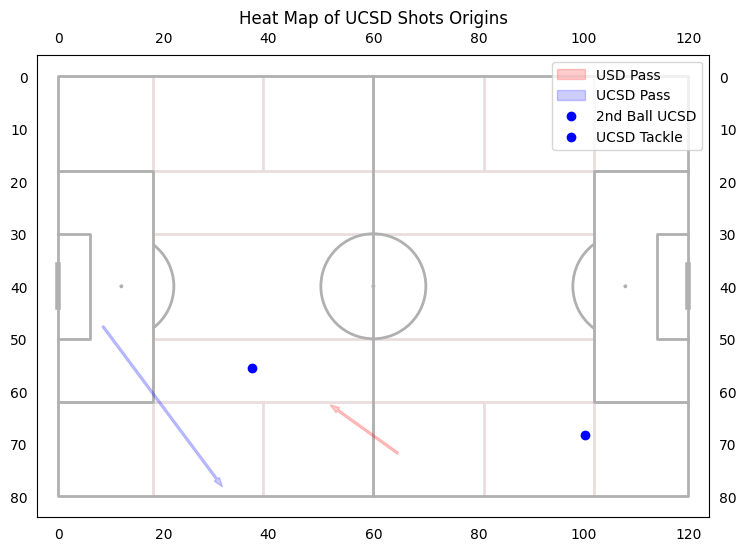

In [84]:
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
#kde = sns.kdeplot(x=ucsdOrigins.get("startX"),y=ucsdOrigins.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 10,cmap = "magma")

for i in range(ucsdOrigins.shape[0]):
    row = ucsdOrigins.iloc[i]
    team = row.get("Team")
    if team == "UCSD":
            color = "blue"
    else:
            color = "red"
    if row.get("Event") == "Tackle" or row.get("Event")=="1st Ball":
        if row.get("Event")=="Tackle":
             shape = 'o'
        else:
             shape = 'v'
        if team == "UCSD":
            color = "b"
            label = team+" "+row.get("Event")
        else:
            color = "b"
            label = "2nd Ball UCSD"
        plt.plot(row.get("startX"),row.get("startY"),shape+color,label = label)
        continue
        
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .4,alpha = .2,color =color,label = team+ " "+row.get("Event"))
plt.title("Heat Map of UCSD Shots Origins")
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())